In [11]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import BatchNormalization, Conv2D, Activation
from keras.layers import GlobalMaxPooling2D, MaxPooling2D
from keras.optimizers import Adam

%matplotlib inline

In [2]:
DATA_FILE = 'data/pp_train_data.h5'
METADATA = 'metadata.npy'

In [3]:
f = h5py.File(DATA_FILE, 'r')
data_x = f['x']
data_y = f['y']
metadata = np.load(METADATA).item()

In [4]:
lr = 1e-3
n_conv_layers = 3
n_kernels = [128] * n_conv_layers
mp_sizes = [(2,2) for _ in range(n_conv_layers)]

model = Sequential()
model.add(BatchNormalization(axis=3, input_shape=data_x.shape[1:]))
for i in range(n_conv_layers):
    model.add(Conv2D(n_kernels[i], 3, 3, init='he_uniform', border_mode='same'))
    model.add(BatchNormalization(axis=3))
    model.add(Activation('relu'))
    if i < n_conv_layers - 1:
        model.add(MaxPooling2D(mp_sizes[i]))

model.add(Conv2D(8,3,3, border_mode='same'))
model.add(GlobalMaxPooling2D())
model.add(Activation('softmax'))
model.compile(Adam(lr), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
batchnormalization_1 (BatchNorma (None, 9, 15, 512)    2048        batchnormalization_input_1[0][0] 
____________________________________________________________________________________________________
convolution2d_1 (Convolution2D)  (None, 9, 15, 128)    589952      batchnormalization_1[0][0]       
____________________________________________________________________________________________________
batchnormalization_2 (BatchNorma (None, 9, 15, 128)    512         convolution2d_1[0][0]            
____________________________________________________________________________________________________
activation_1 (Activation)        (None, 9, 15, 128)    0           batchnormalization_2[0][0]       
___________________________________________________________________________________________

In [5]:
from sklearn.model_selection import train_test_split

data_x = np.asarray(data_x)
data_y = np.asarray(data_y)
X_train, X_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.15, random_state=42)

del(data_x)
del(data_y)

In [7]:
model.fit(X_train, y_train, batch_size=32, nb_epoch=5,
          validation_data=(X_test, y_test))

Train on 3210 samples, validate on 567 samples
Epoch 1/5
3210/3210 [==============================] - 12s - loss: 0.5755 - acc: 0.8187 - val_loss: 0.4545 - val_acc: 0.8730
Epoch 2/5
3210/3210 [==============================] - 8s - loss: 0.0711 - acc: 0.9822 - val_loss: 0.4548 - val_acc: 0.8571
Epoch 3/5
3210/3210 [==============================] - 8s - loss: 0.0206 - acc: 0.9963 - val_loss: 0.1276 - val_acc: 0.9700
Epoch 4/5
3210/3210 [==============================] - 8s - loss: 0.0125 - acc: 0.9975 - val_loss: 0.1565 - val_acc: 0.9594
Epoch 5/5
3210/3210 [==============================] - 8s - loss: 0.0090 - acc: 0.9991 - val_loss: 0.1898 - val_acc: 0.9683


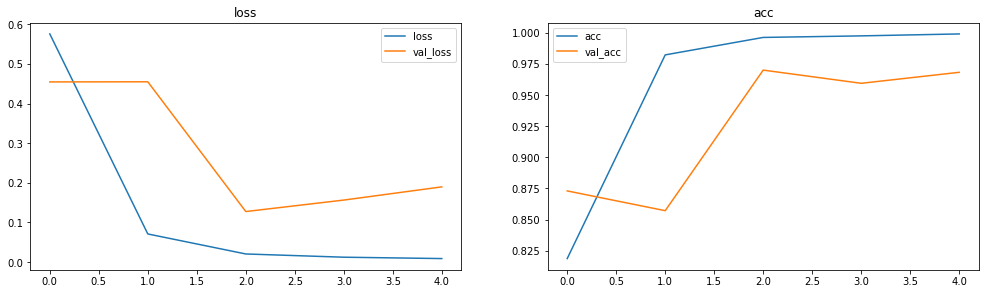

In [16]:
plots = [i for i in model.model.history.history.keys() if i.find('val_') == -1]
plt.figure(figsize=(17,10))

for i, p in enumerate(plots):
    plt.subplot(len(plots), 2, i + 1)
    plt.title(p)
    plt.plot(model.model.history.history[p], label=p)
    plt.plot(model.model.history.history['val_'+p], label='val_'+p)
    plt.legend()

plt.show()